In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU'),tf.config.list_physical_devices('CPU')

([PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')],
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')])

In [2]:
import ROC as roc_maker

import data_preprocess_functions as dp_f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
def plot_sig_bkg(data_type,flag,cut):
    
    if data_type=='test':
        X=X_test_scaled
        X_pl=X_test
        y=y_test
    if data_type=='train':
        X=X_train_scaled
        X_pl=X_train
        y=y_train
        
    NN_pred=NN.predict(X)[:,1]
    
    if flag==0:
        A01=np.array([])
        M01=np.array([])
        for k in range(0,len(y)):
            A01=np.append(A01,y[k]==0 and NN_pred[k]>=cut)
        M01=np.where(A01==1)

    if flag==1:
        A10=np.array([])
        M10=np.array([])
        for k in range(0,len(y)):
            A10=np.append(A10,y[k]==1 and NN_pred[k]<1-cut)
        M10=np.where(A10==1)

    
    fig=plt.figure(figsize=(16,8))
    gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=[1,1,1],figure=fig)
#    fig.suptitle('No cut')

    if flag==0:
        M=M01
        print('Relative fraction of bkg predicted as sig:')
        lab='bkg'
    if flag==1:
        M=M10
        print('Relative fraction of sig predicted as bkg:')
        lab='signal'
        
    print(X[M,0].shape[1]/X.shape[0])
    
    for i in range(0,len(columns_list)):
        ax=fig.add_subplot(gs[i])
        im = ax.hist(X_pl[np.where(y==flag),i][0],bins=100,alpha=0.5,label=lab)
        im = ax.hist(X_pl[M,i][0],bins=100,alpha=0.5,label='wrong '+lab)
        ax.set_xlabel(columns_list[i])
        ax.set_yscale('log')
        ax.legend()
        
#    plt.savefig('wrong'+str(flag)+'.pdf')
    plt.show()

In [4]:
mode='FixedCone/'
path='../PKL/Zprime'+mode+'singleBJet_0.3comp_isfromBoutDR==0_trk_pt>1GeV_trk_d0<5_trk_z0sintheta<25/'
#path='../PKL/Zprime'+mode+'singleBJet_0.5comp_isfromBoutDR==0_IPvars/'

In [5]:
#NN_model_name='NN_base'
PCANN_model_name='PCANN_base'

In [6]:
#NN=tf.keras.models.load_model(path+'models/'+NN_model_name)
PCANN=tf.keras.models.load_model(path+'models/'+PCANN_model_name)

In [7]:
#columns_list=['trk_log_pt', 'trk_eta', 'theta', 'phi', 'log_dr', 'log_ptfrac']

X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_train_cat, y_test, y_test_cat=dp_f.retrieve_dataset(path)
z_train_scaled=np.genfromtxt(path+"z_train_scaled.csv",delimiter=",")
z_test_scaled=np.genfromtxt(path+"z_test_scaled.csv",delimiter=",")

In [14]:
#from numpy import genfromtxt
#z_train_scaled=genfromtxt(path+'z_train_scaled.csv')
#z_test_scaled=genfromtxt(path+'z_test_scaled.csv')

In [8]:
#NN.evaluate(X_test_scaled,y_test_cat)

In [9]:
PCANN.evaluate(z_test_scaled,y_test_cat)

3063/3063 [==============================] - 3s 853us/step - loss: 0.3167 - accuracy: 0.8470


[0.3166731297969818, 0.8470392823219299]

Relative fraction of bkg predicted as sig:
0.07142330179457386


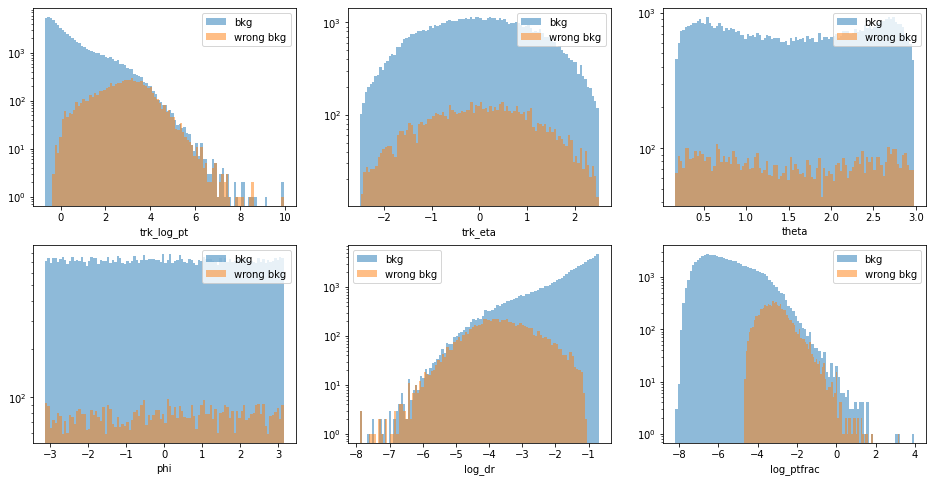

Relative fraction of sig predicted as bkg:
0.04640439698260757


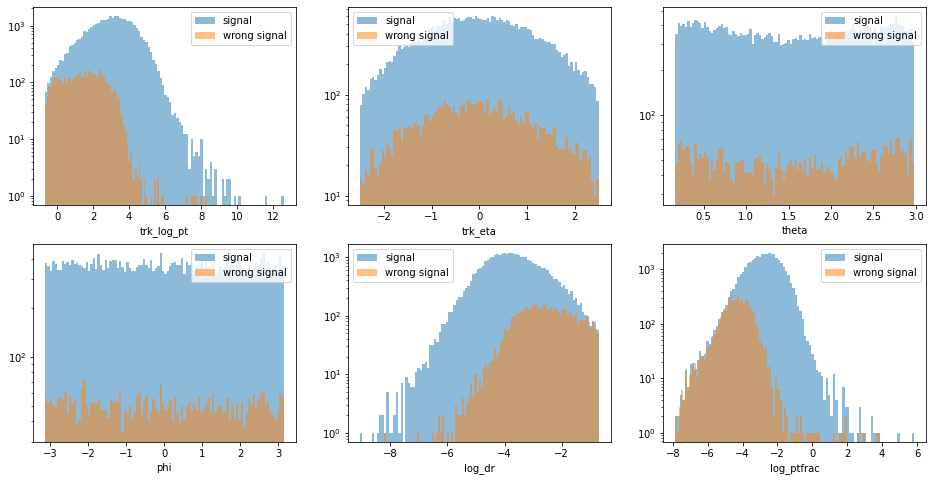

In [13]:
sig_cut=0.5
plot_sig_bkg('test',0,sig_cut)
plot_sig_bkg('test',1,sig_cut)

In [10]:
#NN_base=roc_maker.ROC(NN,X_test_scaled,y_test,NN_model_name)

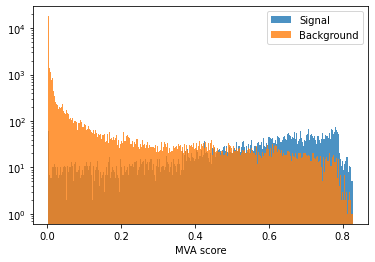

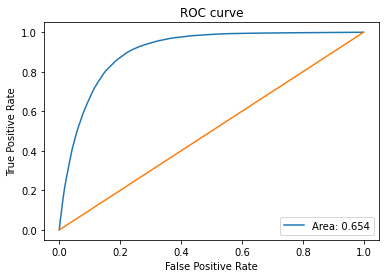

/home/salomongpu/Private/TrackAssociator/v3/scripts/ROC.py:66: RuntimeWarning: divide by zero encountered in true_divide
  rej=1./noise_eff


['4.4', '3.5', '2.7', '2.0']


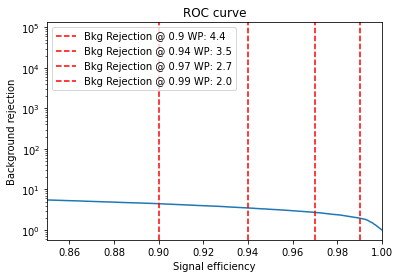

In [11]:
ROC_PCANN_TA=roc_maker.ROC(PCANN,z_test_scaled,y_test,PCANN_model_name)